<a href="https://colab.research.google.com/github/hassanabsi/Survival-analysis-of-heart-failure-patients/blob/main/Survival_analysis_of_heart_failure_patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt

data = pd.read_csv("S1Data.csv")


data.head()



,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
0,97,0,0,0,0,0,1,43.0,50,135,1.30,237000.00,358
1,180,0,1,1,1,0,1,73.0,30,142,1.18,160000.00,231
2,31,1,1,1,0,1,0,70.0,20,134,1.83,263358.03,582
3,87,0,1,0,0,0,1,65.0,25,141,1.10,298000.00,305
4,113,0,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610


In [7]:
data.shape


(299, 13)

Explore data types


In [8]:
data.dtypes


TIME                   int64
Event                  int64
Gender                 int64
Smoking                int64
Diabetes               int64
BP                     int64
Anaemia                int64
Age                  float64
Ejection.Fraction      int64
Sodium                 int64
Creatinine           float64
Pletelets            float64
CPK                    int64
dtype: object

## Descriptive statistics

In [9]:
for col in data.columns:
    if pd.api.types.is_numeric_dtype(data[col]):
        print(f"Column: {col} - Mean: {data[col].mean()}, Median: {data[col].median()}, Q1: {data[col].quantile(.25)}, Q3: {data[col].quantile(.75)}")
    else:
        print(f"Column: {col} - Unique values: {data[col].unique()}")


Column: TIME - Mean: 130.2608695652174, Median: 115.0, Q1: 73.0, Q3: 203.0
Column: Event - Mean: 0.3210702341137124, Median: 0.0, Q1: 0.0, Q3: 1.0
Column: Gender - Mean: 0.6488294314381271, Median: 1.0, Q1: 0.0, Q3: 1.0
Column: Smoking - Mean: 0.3210702341137124, Median: 0.0, Q1: 0.0, Q3: 1.0
Column: Diabetes - Mean: 0.4180602006688963, Median: 0.0, Q1: 0.0, Q3: 1.0
Column: BP - Mean: 0.3511705685618729, Median: 0.0, Q1: 0.0, Q3: 1.0
Column: Anaemia - Mean: 0.431438127090301, Median: 0.0, Q1: 0.0, Q3: 1.0
Column: Age - Mean: 60.83389297658862, Median: 60.0, Q1: 51.0, Q3: 70.0
Column: Ejection.Fraction - Mean: 38.08361204013378, Median: 38.0, Q1: 30.0, Q3: 45.0
Column: Sodium - Mean: 136.62541806020067, Median: 137.0, Q1: 134.0, Q3: 140.0
Column: Creatinine - Mean: 1.3938795986622072, Median: 1.1, Q1: 0.9, Q3: 1.4
Column: Pletelets - Mean: 263358.02926421404, Median: 262000.0, Q1: 212500.0, Q3: 303500.0
Column: CPK - Mean: 581.8394648829432, Median: 250.0, Q1: 116.5, Q3: 582.0


##Visualizations


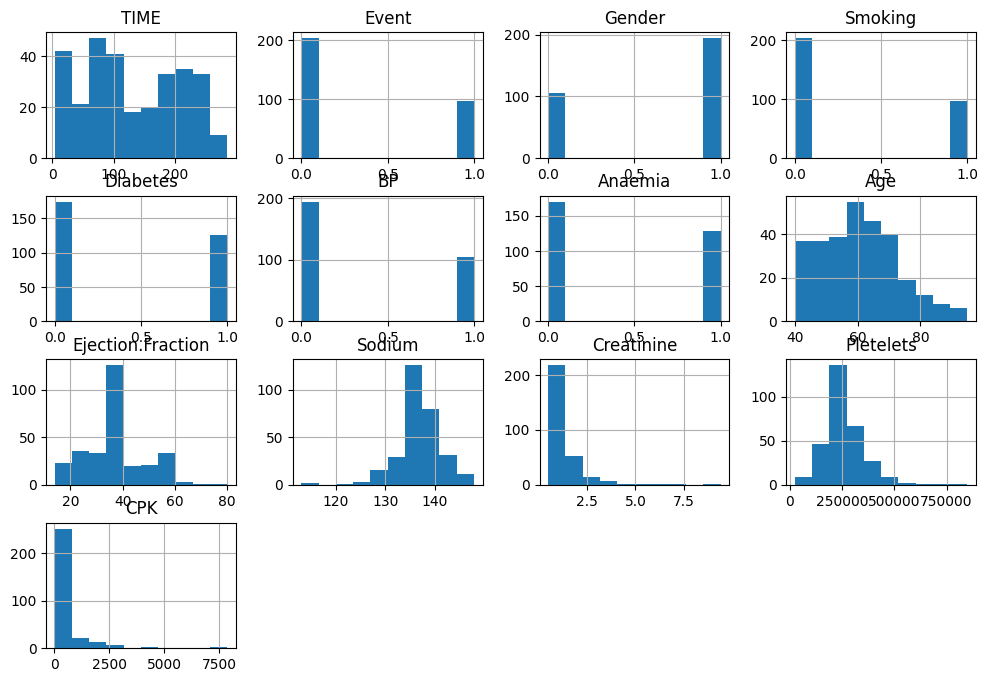

In [10]:
data.hist(figsize=(12, 8))
plt.show()

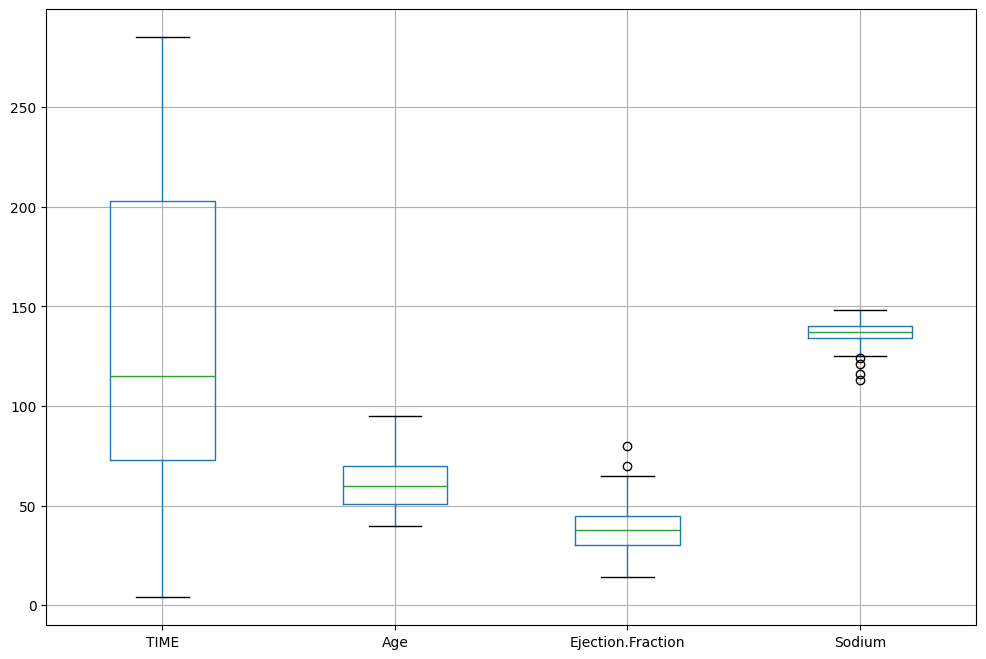

In [11]:
column_to_show = ['TIME', 	'Age',	'Ejection.Fraction',	'Sodium'  ]

data_to_plot = data[column_to_show]

data_to_plot.boxplot(figsize=(12, 8))
plt.show()



## Check for missing values


In [12]:
print(data.isnull().sum())

TIME                 0
Event                0
Gender               0
Smoking              0
Diabetes             0
BP                   0
Anaemia              0
Age                  0
Ejection.Fraction    0
Sodium               0
Creatinine           0
Pletelets            0
CPK                  0
dtype: int64


## Outliers Analysis


In [13]:
def detect_outliers_zscore(column):
    z_scores = (column - column.mean()) / column.std()
    outliers = column[abs(z_scores) > 3]
    return outliers

columns_to_check = ["Age", "Ejection.Fraction","Sodium", "Creatinine" , "Pletelets" ,"CPK"]

all_outliers = pd.DataFrame()

for column in columns_to_check:
    outliers = detect_outliers_zscore(data[column])
    all_outliers = pd.concat([all_outliers, outliers], axis=1)

print(all_outliers)

     Age  Ejection.Fraction  Sodium  Creatinine  Pletelets     CPK
275  NaN               80.0     NaN         NaN        NaN     NaN
97   NaN                NaN   116.0         NaN        NaN     NaN
104  NaN                NaN   113.0         NaN        NaN     NaN
292  NaN                NaN   121.0         NaN        NaN     NaN
37   NaN                NaN     NaN         6.1        NaN     NaN
82   NaN                NaN     NaN         9.0        NaN     NaN
84   NaN                NaN     NaN         5.8        NaN     NaN
86   NaN                NaN     NaN         5.0        NaN     NaN
146  NaN                NaN     NaN         9.4        NaN     NaN
228  NaN                NaN     NaN         6.8        NaN  3964.0
98   NaN                NaN     NaN         NaN   621000.0     NaN
205  NaN                NaN     NaN         NaN   850000.0     NaN
262  NaN                NaN     NaN         NaN   742000.0     NaN
25   NaN                NaN     NaN         NaN        NaN  78

### Check for duplicate rows


In [14]:
dupes = data[data.duplicated()]

print(dupes)

Empty DataFrame
Columns: [TIME, Event, Gender, Smoking, Diabetes, BP, Anaemia, Age, Ejection.Fraction, Sodium, Creatinine, Pletelets, CPK]
Index: []


### Check for unique values and inconsistencies


In [15]:
print(data["Event"].unique())
print(data["Gender"].unique())
print(data["Smoking"].unique())
print(data["Diabetes"].unique())
print(data["BP"].unique())
print(data["Anaemia"].unique())

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]


#Interactions study:key factors contributing towards increased risk of mortality among heart failure patients

###Using logistic regression model

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report


X = data.drop(columns=["Event"])
y = data["Event"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
log_reg = LogisticRegression()

# Fit the model
log_reg.fit(X_train, y_train)

# Evaluate the model
accuracy = log_reg.score(X_test, y_test)
print("Accuracy:", accuracy)




Accuracy: 0.8166666666666667


##Generate polynomial features to capture interactions

In [17]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

log_reg_poly = LogisticRegression()
log_reg_poly.fit(X_train_poly, y_train)
#Logistic Regression Model with Polynomial Features:
accuracy_poly = log_reg_poly.score(X_test_poly, y_test)
print("Accuracy with polynomial features:", accuracy_poly)

Accuracy with polynomial features: 0.8333333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###Get feature importance form logistic regression model

In [18]:
feature_importance = abs(log_reg.coef_[0])

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


              Feature    Importance
7   Ejection.Fraction  7.868344e-02
6                 Age  5.734294e-02
0                TIME  2.143991e-02
8              Sodium  7.275820e-03
9          Creatinine  5.078893e-03
2             Smoking  1.041715e-03
1              Gender  7.529393e-04
11                CPK  3.541538e-04
4                  BP  2.430484e-04
3            Diabetes  2.209522e-04
5             Anaemia  1.559068e-04
10          Pletelets  9.951703e-07


##

## logistic regression interaction coefficients(new model)

In [19]:
from sklearn.linear_model import LogisticRegression

independent_vars = ['TIME', 'Gender', 'Smoking', 'Diabetes', 'BP', 'Anaemia',
                    'Age', 'Ejection.Fraction', 'Sodium', 'Creatinine',
                    'Pletelets', 'CPK']

for var in independent_vars:
    data["Interaction"] = data[var] * data["Event"]

    model = LogisticRegression()
    model.fit(data[[var, "Event", "Interaction"]], data["Event"])

    interaction_coef = model.coef_[0][2]
    if abs(interaction_coef) > 0.1:  # significance threshold
        print(f"The interaction coefficient  between {var} and Event (coef: {interaction_coef})")


The interaction coefficient  between TIME and Event (coef: 0.7189591608229926)
The interaction coefficient  between Gender and Event (coef: 1.9399675372280398)
The interaction coefficient  between Smoking and Event (coef: 1.104237367518154)
The interaction coefficient  between Diabetes and Event (coef: 1.360309321156833)
The interaction coefficient  between BP and Event (coef: 1.2610715441573275)
The interaction coefficient  between Anaemia and Event (coef: 1.4526620260729552)
The interaction coefficient  between Age and Event (coef: 0.37432924399198475)
The interaction coefficient  between Ejection.Fraction and Event (coef: 0.6419589506129408)
The interaction coefficient  between Sodium and Event (coef: 0.1736910861115269)
The interaction coefficient  between Creatinine and Event (coef: 3.373209269672833)
The interaction coefficient  between CPK and Event (coef: 0.33343156234087784)


##using Chi-square test for categorical parameters



In [20]:
from scipy.stats import chi2_contingency

parameters = [ 'Gender', 'Smoking', 'Diabetes', 'BP', 'Anaemia'
              ]

for parameter in parameters:
    contingency_table = pd.crosstab(data[parameter], data["Event"])

    _, p_value, _, _ = chi2_contingency(contingency_table)

    if p_value < 0.05:
        print(f"Significant interaction between {parameter} and mortality (p-value: {p_value})")

    else:
        print(f"No Significant interaction between {parameter} and mortality (p-value: {p_value})")


No Significant interaction between Gender and mortality (p-value: 1.0)
No Significant interaction between Smoking and mortality (p-value: 0.9317652998235507)
No Significant interaction between Diabetes and mortality (p-value: 1.0)
No Significant interaction between BP and mortality (p-value: 0.21410341199416902)
No Significant interaction between Anaemia and mortality (p-value: 0.3073160508415107)


#Interactions plots

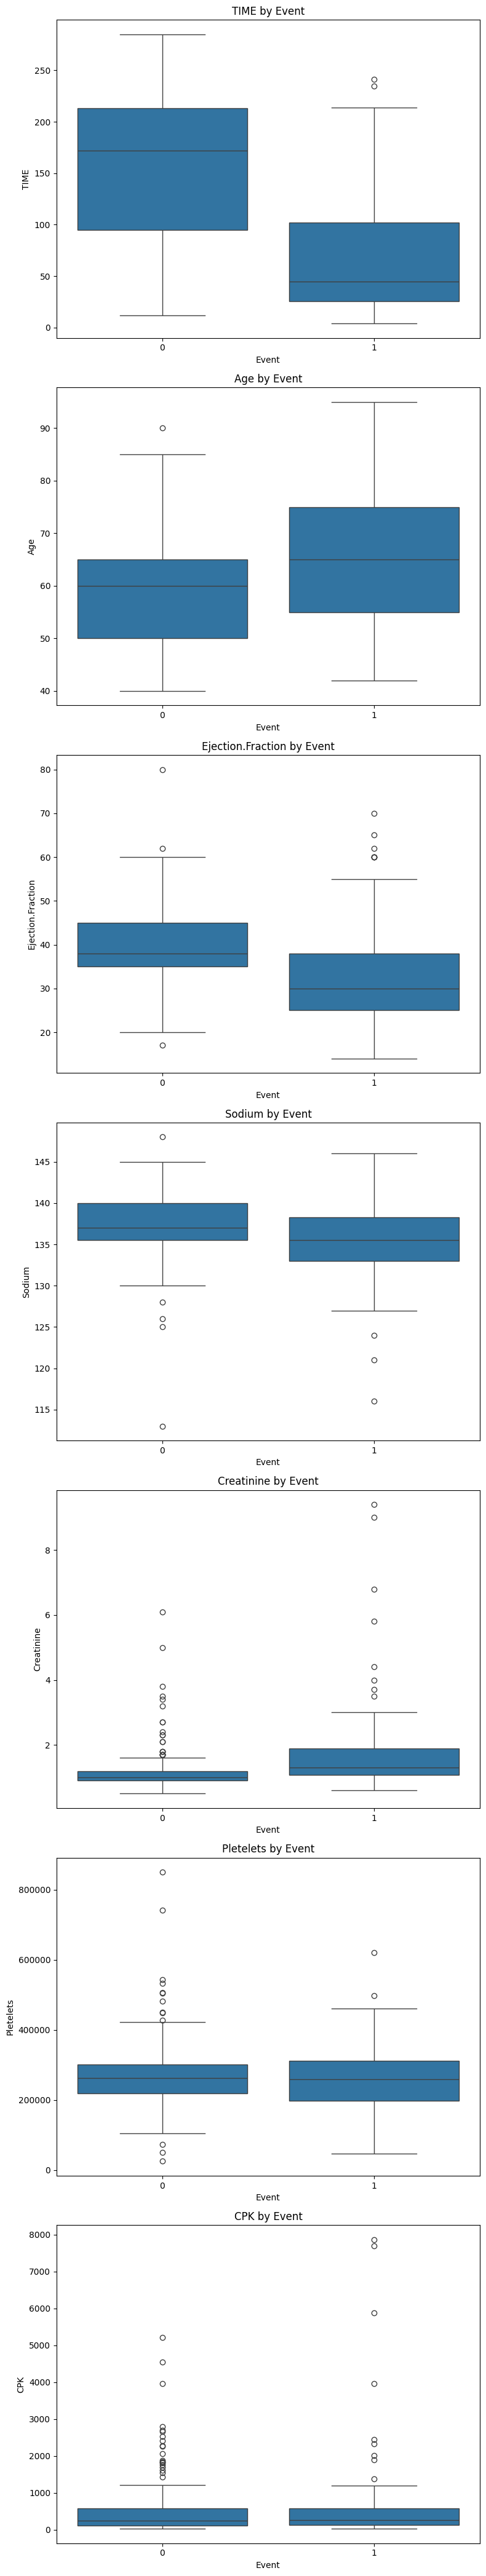

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_parameters = ['TIME', 'Age', 'Ejection.Fraction', 'Sodium', 'Creatinine', 'Pletelets', 'CPK']

fig, axes = plt.subplots(nrows=len(numerical_parameters), ncols=1, figsize=(8, 6 * len(numerical_parameters)))

for i, param in enumerate(numerical_parameters):
    sns.boxplot(x="Event", y=param, data=data, ax=axes[i])
    axes[i].set_xlabel("Event")
    axes[i].set_ylabel(param)
    axes[i].set_title(f"{param} by Event")

plt.tight_layout()
plt.show()


##Decision tree classifier

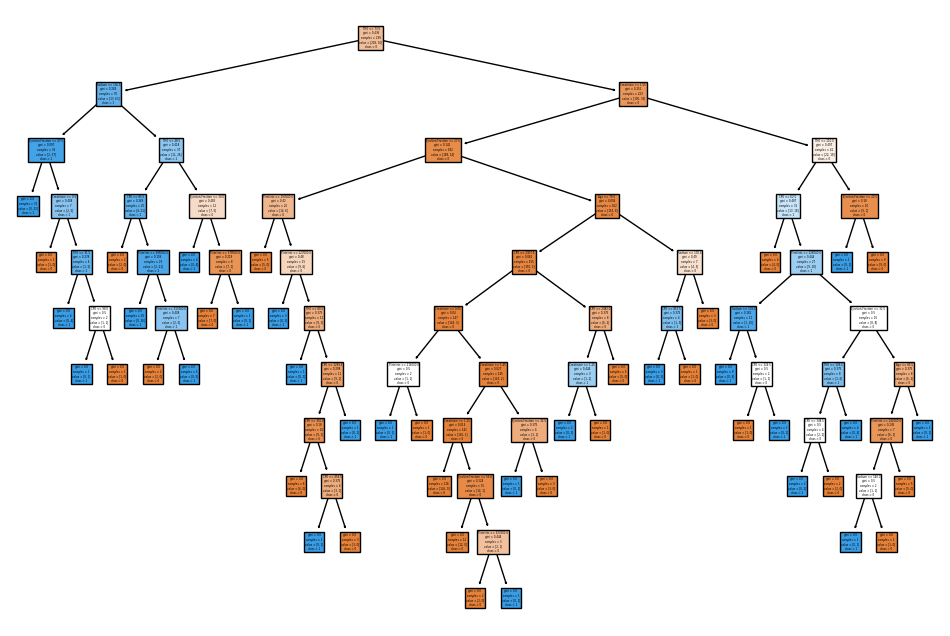

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

numerical_parameters = ['TIME', 'Age', 'Ejection.Fraction', 'Sodium', 'Creatinine', 'Pletelets', 'CPK']

clf = DecisionTreeClassifier()

clf.fit(data[numerical_parameters], data['Event'])

plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=numerical_parameters, class_names=['0', '1'], filled=True)
plt.show()


##Decision tree classifier Feature importance

Feature ranking:
1. Feature TIME: 0.47456917637157353
2. Feature CPK: 0.13351177400822267
3. Feature Pletelets: 0.11147762037155512
4. Feature Creatinine: 0.1076409204549636
5. Feature Ejection.Fraction: 0.10042362477664532
6. Feature Sodium: 0.04637394852831075
7. Feature Age: 0.026002935488728837


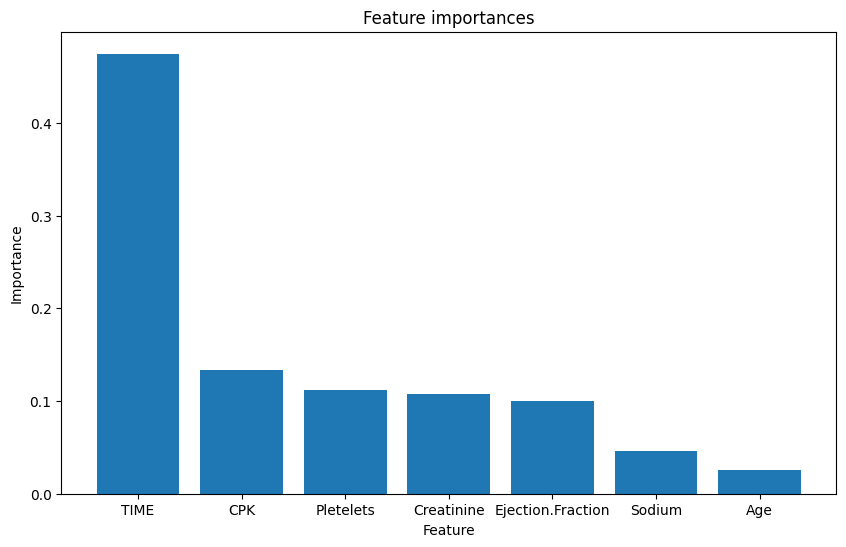

In [23]:
import numpy as np
#we can gain insights into which numerical parameters are the most significant
# predictors of the binary 'Event' according to the decision tree model

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(len(numerical_parameters)):
    print(f"{f + 1}. Feature {numerical_parameters[indices[f]]}: {importances[indices[f]]}")

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(len(numerical_parameters)), importances[indices], align="center")
plt.xticks(range(len(numerical_parameters)), [numerical_parameters[i] for i in indices])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


In [24]:
from sklearn.inspection import permutation_importance

# Train a model (e.g., logistic regression)
model = LogisticRegression()
model.fit(data[['TIME', 'Gender', 'Smoking', 'Diabetes', 'BP', 'Anaemia', 'Age', 'Ejection.Fraction', 'Sodium', 'Creatinine', 'Pletelets', 'CPK']], data["Event"])

# Calculate permutation importance
importance = permutation_importance(model, data[['TIME', 'Gender', 'Smoking', 'Diabetes', 'BP', 'Anaemia', 'Age', 'Ejection.Fraction', 'Sodium', 'Creatinine', 'Pletelets', 'CPK']], data["Event"])

# Analyze importance scores to identify significant interactions
for i, column in enumerate(data[['TIME', 'Gender', 'Smoking', 'Diabetes', 'BP', 'Anaemia', 'Age', 'Ejection.Fraction', 'Sodium', 'Creatinine', 'Pletelets', 'CPK']].columns):
    print(f"{column}: {importance.importances_mean[i]}")


TIME: 0.17123745819397992
Gender: 0.0
Smoking: 0.0
Diabetes: 0.0
BP: 0.0
Anaemia: 0.0
Age: 0.024080267558528413
Ejection.Fraction: 0.05551839464882942
Sodium: -0.004682274247491636
Creatinine: 0.0
Pletelets: -0.00735785953177257
CPK: 0.0
